# SKLEARN basics

Sklearn is library based on scipy made for machine learning. Basicly it's collection of ready to use basic ML algorithms, without neural networks included. 
Sklearn library can be found [here](https://scikit-learn.org/stable/)

All models shares common interface:

- **fit()** method that is used to train model based on given input
- **predict()** method, that is used for predicting/ classifying given data

### fit() method

**fit(X, y)** method takes two array arguments : input_data and target_labels

It's using gradient descent to optimize our model paramters given input data

It requied that those two input data are *numpy arrays* or *pandas DataFrame* objects. Also those values need to be continuous, like price of the house or some catagory information.
Additionally before working with those data, ther cannot be any missing values, so in most cases some preprocessing is needed.

Example [SGDClassifier fit method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier.fit)

### predict() method

**predict(X)** method takes only one array argument as input : input_data. Then it just pass this data through trained model and give us some "prediction" output. 

Same as with **fit()** method input_data needs to be *numpy array* or *pandas DataFrame* and has to be continuous/without any missing values.

Example [SGDClassifier predict method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier.predict)

### score() method

**score(X, y)** method tells us how accurate our model is. It's basic measurement of our model behaviour

Example [SGDClassifier score method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier.score)

In [103]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
"""
    TODO:
    - create model using SGDClassifier from sklearn library
    - train model using X, y data
    - predict outputs for X[1:5] and compare them with targeted ones
    - calcualte metric how good classifier is 
"""

mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

X, y = mnist_data['data'], mnist_data['target']

# TODO:
# - create classifier
# - train model using fit()
# - calculate metric using score()

# SKLEARN data manipulation

Another thing that is used in ML/ neural networks from sklearn is ability to easly manipulate input data:

- splitting data into traininig/testing dataset
- using technique called *Cross validation*
- making metrics to evalute accuracy of our model


### Splitting data into training/testing dataset

First one basic concept: *overfitting*. 

Overfitting occurs when our model predicts output/classes very good during training but gets bad results/ cannot generalize very well when get him data he didn't saw during training ( it cannot predict good output for new data ). This is bad, bacause we want our model to predict with great accuracy always.

In order to check if this would happens we can do simple trick: 
- given out input_data with corresponding labels, we can split them into training part and testing part. 
- during training we don't touch testing part of our input_data/lables and we only train our model on trainind data
- after trianing is done we check how ggood it behave on data it didn't saw earlier
- if there is big gap between accuracy of both sets, we have overfitting and we have to find a way to handle it


### train_test_split()

In sklearn there is method [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split) that does this kind of split/shuffle etc. 

If we give our model too little data during training we can meet other problem called underfitting. It happens when our model doesn't generalize well on any data, for example by ddrawing only one line

After training long enough our model will learn to fit training data with 100% accuracy


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

"""

TODO:

- import all needed libraries
- rewite above example and split dataset into train and test.
- check score on different splits
"""

0.9527777777777777


### Overfitting Underfitting

Ofter there is information that model XXX is underfitting or model XXX is overfitting, but what exacly is underfitting or overfitting ?

Underfitting is when our model doesn't generalize well on training/test/any data, for example trying to aproximate quadratic function with linear one.

Overfitting on the oher hand is when our model tries to fit every sinbgle point we give him during training. Because of that it learns training dataset patterns/relations, not general one. Golden goose in in the middle. Below there are three drawings with how both of them plus ok model looks like :

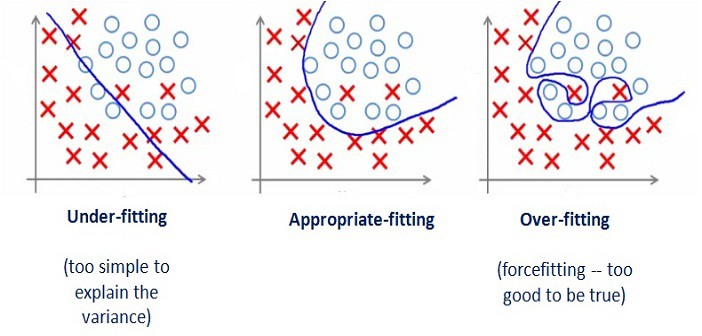

We can see here that ok model leave some points on ther other side of classification border.

There are two things connected with overfitting and underfitting :

- **bias**  that tells us how much do we differ from baseline error rate ( for example hman classification labels )
- **variance** tells us how much do we differ between our training error and testing error ( testing on data that wasn't used during training )

|                 |               |           |               |              |
|-----------------|---------------|-----------|---------------|--------------|
| Train set error | 1%            | 15%       | 13%           | 0\.5%        |
| Test set error  | 11%           | 16%       | 30%           | 1%           |
|                 | High Variance | High Bias | High Variance | Low Variance |
|                 |               |           | High Bias     | Low BIas     |

Basically we want to have smallest gap between training dataset and testing dataset error and  be closest to human error rate


Below there is sample methods that are underfitting and overfitting.

Also please read about [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) feature and use it to change linear regression into [polynomial regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures) in order to fit non linear dataset.

In [63]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

"""

TODO:

- Fill blanks in code to make it work using numpy/ sklearn only
- Create LinearRegression model with default parameters
- Create Pipeline that will change linar regression into polynomial one
- fit and predict on created pipeline
- plot returned values

First plot will show underfitting model
Second plot will show overfitting model
"""

# definition of sin function that will be used
def true_fun(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 15]

# input/output data creating
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 10))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    #TODO:
    #  create linear regression model 
    #  create polynomial_features that will have actual degree and include_bias=False
    #  combine them both in one Pipeline
    #  train pipeline using fit() method and prepared X, y 

    X_test = np.linspace(0, 1, 100)
    
    #TODO:
    #  predict output of pipeline for X_test dataset and put it into #######, place below
    
    plt.plot(X_test, #######, label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
plt.show()

SyntaxError: invalid syntax (<ipython-input-63-798d61aefd28>, line 55)

### Cross Validation

In some cases when we make split of data into train and test parts, we can get test part containing similiar data that are in train part. In this case we would get very good results on both, but when new data would arive model will be bad.

To avoid this we can use cross validation.

Basically idea is following:
1. We're splitting data into for example 5 parts ( 5 folds )
2. we're training our model on all parts except one and get some result
3. next we train new model again on 4 parts except another one part
4. etc..

Below picture taken from skleanr, shows how it looks like:

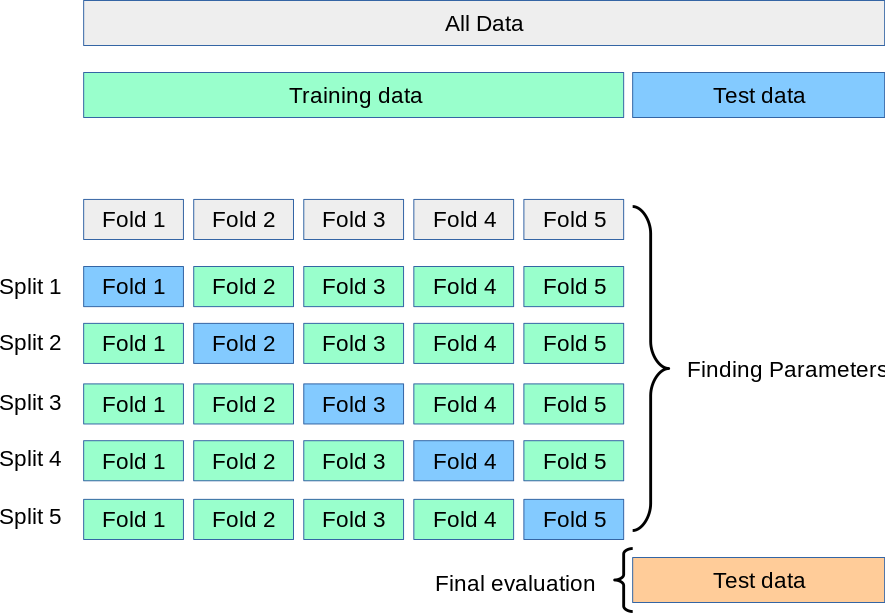

Each time we're training our model ( from the very start ) on 4 parts, and test on 1 part. Each time testing part is different.

This will allow us to be sure that our model is behaving very well on different, unseen datasets, so we can get more assurance that there is no repeating patterns that could make model accuracy score higher that it really is 

To calculate our metric we can use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) method from sklearn. It will return us evaluation metric for each fold.

In [1]:
from sklearn.model_selection import cross_val_score

"""

TODO:
- import all needed libraries
- create linear Classification classifier (SGDClassifier)
- split data into trainng/test dataset with 80%/20% split
- fit classifier to train data
- check classifier score
- calculate cross validation score using scoring="accuracy" and 5 folds
- check how score is changing when using 2,3,10 folds

"""

mnist_data = fetch_openml('mnist_784', version=1)
print(mnist_data.keys())

X, y = mnist_data['data'], mnist_data['target']

#  TODO : put code here
#

NameError: name 'fetch_openml' is not defined

In [ ]:
"""
ADVANCED TODO:
- write cross-validation from scratch using following sklearn methods:
  - StratifiedKfold
  - remember that each "fold" have to have fresh classifier that will be trained and then makes prediction on given fold. Then it should give accuracy of given fold ( correct/ all )
- write cross-validation from scratch without using sklearn methods, only numpy/python one
- compare results with those provided by sklearn
"""

# Metrics

As it comes for metrics, there is one basic, that everyone has in mind when asked: accuracy. 
But it apears that this metric is a bit screwed when it comes to real datasets, that are mostly imbalanced ( there is more one class than others ). 
Below there is simple dataset that i very imbalanced (95% vs 5%)

In [66]:
from numpy import unique
from sklearn.datasets import make_classification
# generate 2 class dataset
# with split 99%/1% in class labels
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], flip_y=0, random_state=1)
# summarize dataset
classes = unique(y)
total = len(y)
for c in classes:
    n_examples = len(y[y==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

> Class=0 : 990/1000 (99.0%)
> Class=1 : 10/1000 (1.0%)


### Imbalanced datasets splitting/ cross validation

When we want to measure this dataset behaviour by "accuracy" we can make very simple program that will classify everything as class 0 and still we get >90% accuracy, so we check nothing See example below

In [67]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

# classifiers have to inherit from BaseEstimator

class Always_class_0(BaseEstimator):
    # fit will return nothing interesting and do nothing becuase we don`t want to train anything
    def fit(self, x, y=None):
        return self
    # predict() will always return 0 for all input data
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

clf = Always_class_0()
cross_val_score(clf, X, y, cv=5, scoring="accuracy")

array([0.985, 0.995, 0.985, 0.995, 0.99 ])

Also there is one more problem with unbalanced datasets - when we want to split them, we can have few sets that are not reliable for exalpe : all '1' classes are in train set or vice versa

In [68]:
"""

TODO:
- make spit with following parameters: 80%/20% split and random_state=3
"""

# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=792, 1=8, Test: 0=198, 1=2


As we can see in the above example we have all "1" classes in Train dataset, so basically when we would test out model with test_dataset, there would be no real testing done, due to absence of `1` classes there. Also we can have viceversa situation.
To fight with this sklearn allows us to "stratify" our split or kfold.
This is done with **stratify** parameter in [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split) method, that will split given values in train and test dataset according to given split. So if we make 80%/20% split, then we will have same split on our classes

In [69]:
"""

TODO:
- make stratified spit with following parameters: 80%/20% split and random_state=3
"""

# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=792, 1=8, Test: 0=198, 1=2


Due to that there are several other metrics that are used in ML to check how good our model is:
- Confusion matrix
- Precision
- Recall
- Precision-Recall Curve
- ROC curve
- F1/ F_beta score

##  PART 2